In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

tag_id = preprocessing.LabelEncoder()
genre_id = preprocessing.LabelEncoder()

data = pd.read_csv("data.csv").dropna()

tag_id.fit(data.tag)
genre_id.fit(data.genre)
data.tag = tag_id.transform(data.tag)
data.genre = genre_id.transform(data.genre)
data.drop(["Unnamed: 0", "likes"],axis = 1, inplace=True)
data.drop_duplicates(inplace=True)
data.head()

,id,user_id,genre,tag,followee_id,playback_count
0,146341923.0,1377057.0,26,2866,34242712.0,17147549.0
1,146341923.0,1377057.0,26,2866,6349040.0,17147549.0
2,146341923.0,1377057.0,26,2866,18217449.0,17147549.0
3,146341923.0,1377057.0,26,2866,10494998.0,17147549.0
4,146341923.0,1377057.0,26,2866,14449884.0,17147549.0


In [172]:
y = data.genre.as_matrix()

In [11]:
X = data[["id", "user_id", "genre" , "tag", "followee_id", "playback_count"]].as_matrix()

In [3]:
X = data[["id", "user_id", "genre" , "tag", "followee_id"]].as_matrix()

In [174]:
print("There are",  len(genre_id.classes_) , "genres")

There are 41 genres


In [175]:
len(set(y))

41

In [12]:
from megaman.embedding import (Isomap, LocallyLinearEmbedding,
                               LTSA, SpectralEmbedding)
from megaman.geometry import Geometry

n_components = 3
radius = 80
affinity_method = 'gaussian'
affinity_kwds = {'radius':radius}
adjacency_kwds = {'radius':radius}
geom = Geometry(affinity_kwds=affinity_kwds, adjacency_kwds= adjacency_kwds)

spectral = SpectralEmbedding(n_components=n_components, eigen_solver='arpack',geom=geom, drop_first=False) # use 3 for spectral
embed_spectral = spectral.fit_transform(X)

/Users/omarkhan/anaconda3/lib/python3.5/site-packages/megaman/embedding/spectral_embedding.py:180: UserWarning: Graph is not fully connected: spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected: "


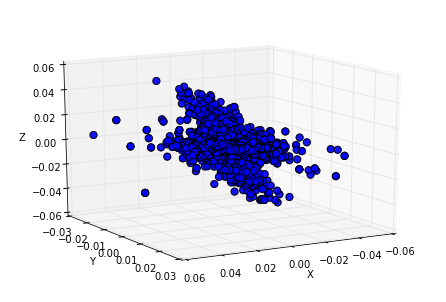

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-0.005, 0.005)
ax3d = Axes3D(fig)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.view_init(elev=15., azim=60)
# labels = [y_ for y_ in y if y_ == 0 or y_ == 8 or y_ == 18 or y_ == 26 or y_ == 12]

# colors = ['orange' if y == 0 else 'lightblue' if y ==8 else 'red' if y == 18 else 'green' if y == 26 else 'purple' for y in labels]

ax3d.scatter(embed_spectral[:, 2], embed_spectral[:, 1] , embed_spectral[:, 0], s=50, alpha=0.7)

In [178]:
embed_spectral.shape

(87560, 3)

In [14]:
data = pd.concat([data,pd.DataFrame(columns=list('xyz'))])

In [15]:
data.x = embed_spectral[:, 0]
data.y = embed_spectral[:, 1]
data.z = embed_spectral[:, 2]

In [16]:
data = data[["id", "x", "y", "z", "playback_count"]]

In [165]:
data.to_csv("spectral_embedded_data.csv")

In [166]:
data.head()

,id,x,y,z
0,146341923.0,-0.000875,0.000122,-0.001417
1,146341923.0,0.001226,-0.002358,0.001461
2,146341923.0,0.000534,0.001257,0.001432
3,146341923.0,-0.000714,-0.000514,-0.002688
4,146341923.0,0.002149,-0.001000,0.004018


In [169]:
lle = LocallyLinearEmbedding(n_components=n_components, eigen_solver='amg',geom=geom)
embed_lle = lle.fit_transform(X)

error: (shape(a,0)==shape(b,0)) failed for 2nd argument b

In [ ]:
isomap = Isomap(n_components=n_components, eigen_solver='arpack',geom=geom)
embed_isomap = isomap.fit_transform(X)